# Step 1.Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2.Read Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

# Then load it (adjust the name if needed)
data = pd.read_csv("bank.csv")


Saving bank.csv to bank.csv


In [ ]:
df=pd.read_csv("bank.csv")

In [ ]:
#head
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#tail
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


# Step 3.Sanity Check of Data

In [ ]:
# Shape
df.shape

(11162, 17)

In [ ]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Finding missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Finding Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# identify garbage values
for i in df.select_dtypes("object").columns:
    print(df[i].value_counts())
    print("***"*10)

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
******************************
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
******************************
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
******************************
default
no     10994
yes      168
Name: count, dtype: int64
******************************
housing
no     5881
yes    5281
Name: count, dtype: int64
******************************
loan
no     9702
yes    1460
Name: count, dtype: int64
******************************
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
******************************
month
may    2824
aug    1519
jul  

In [ ]:
# data types
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


# Step 4.Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive Statistics
df.describe

<bound method NDFrame.describe of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]>

In [ ]:
df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


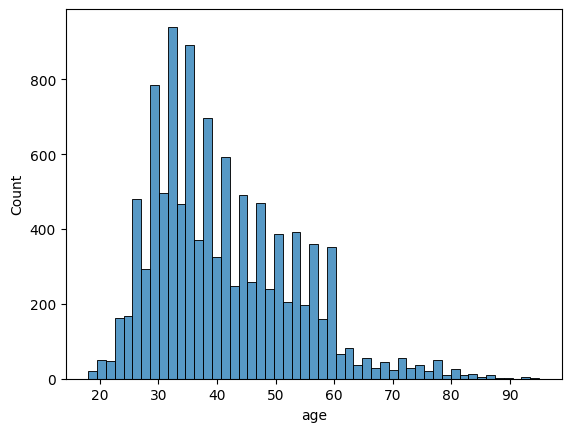

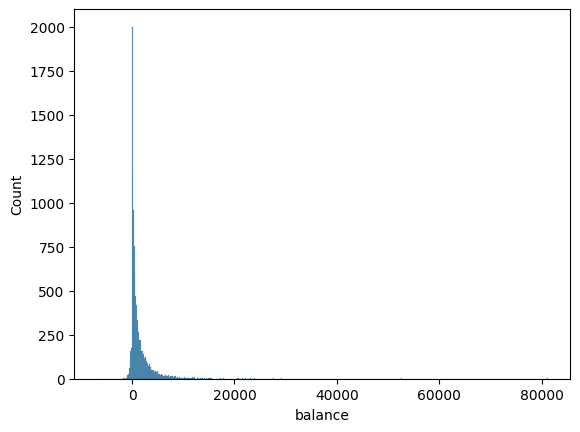

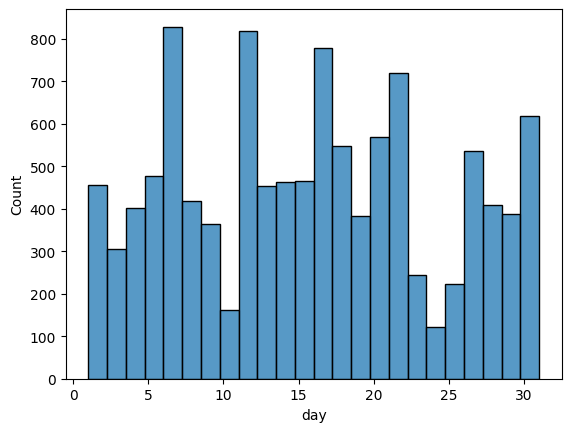

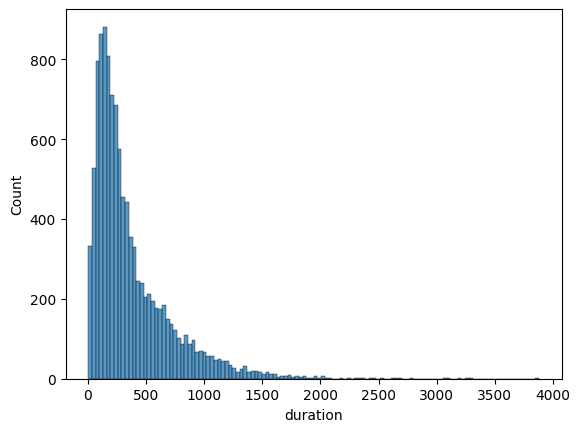

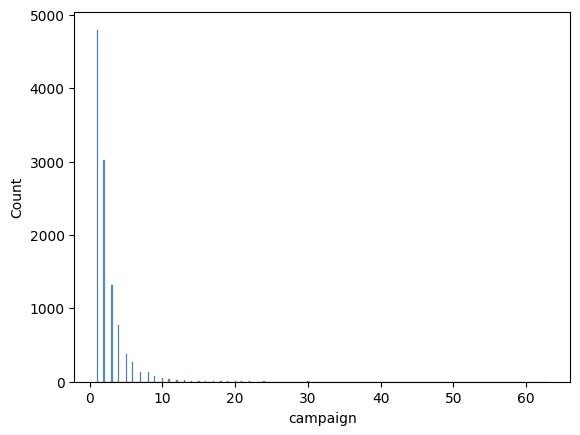

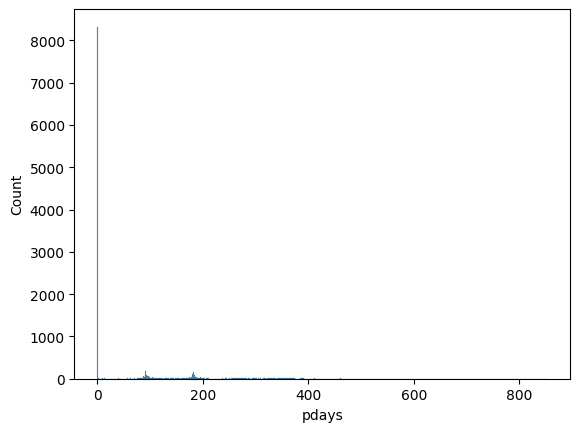

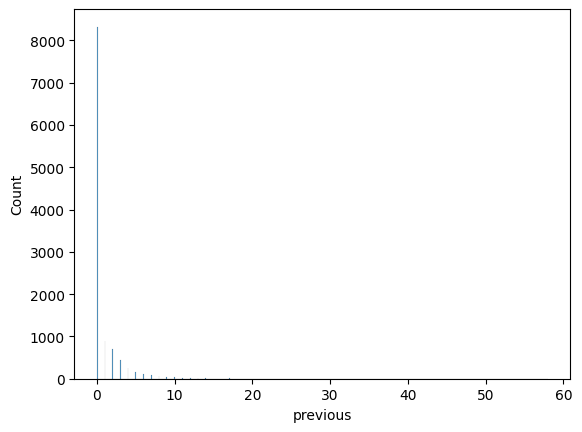

In [ ]:
# Histrogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

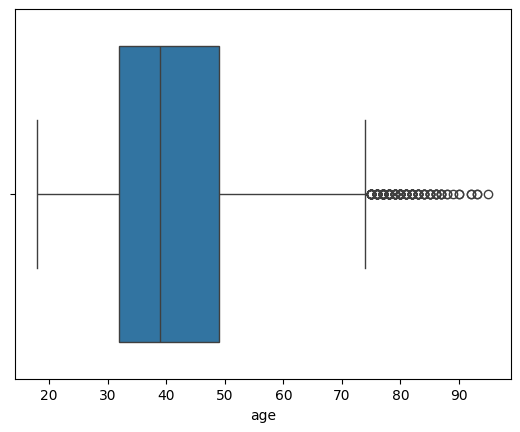

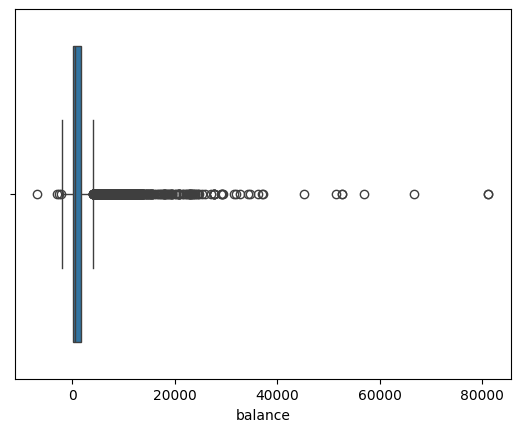

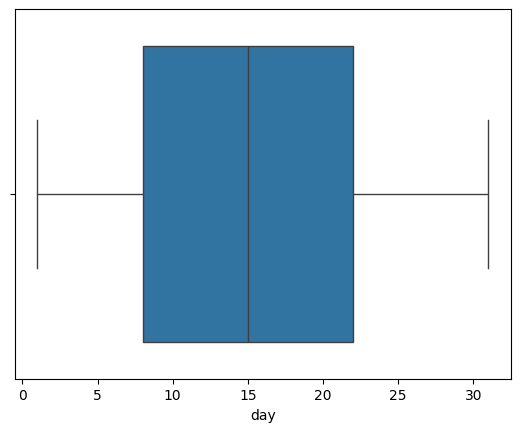

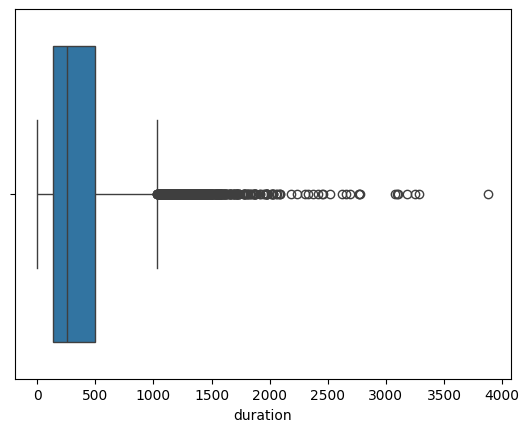

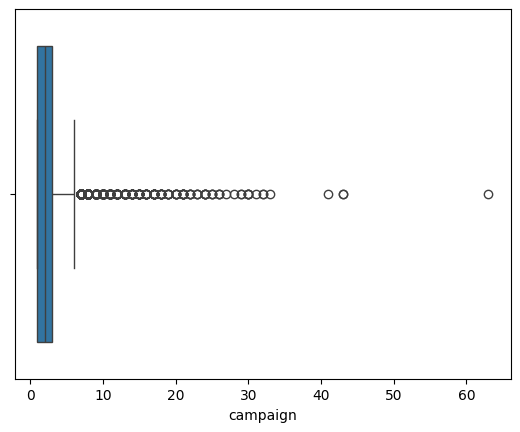

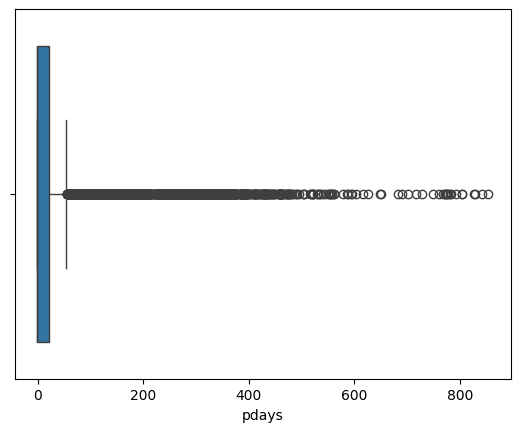

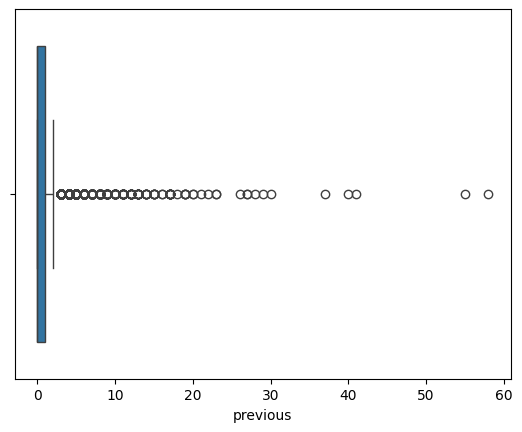

In [ ]:
# Boxplot to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

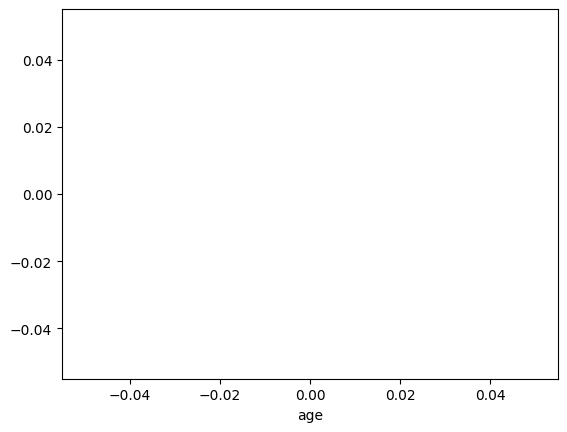

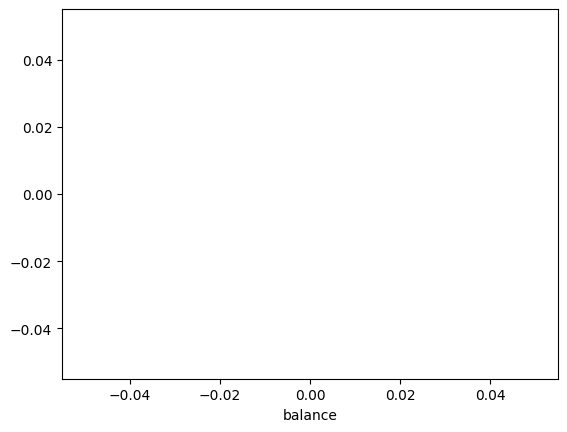

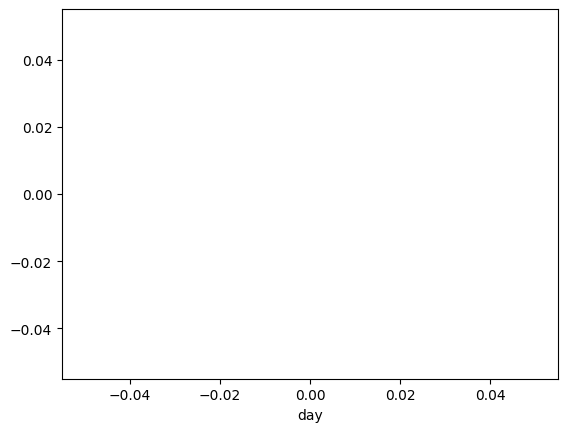

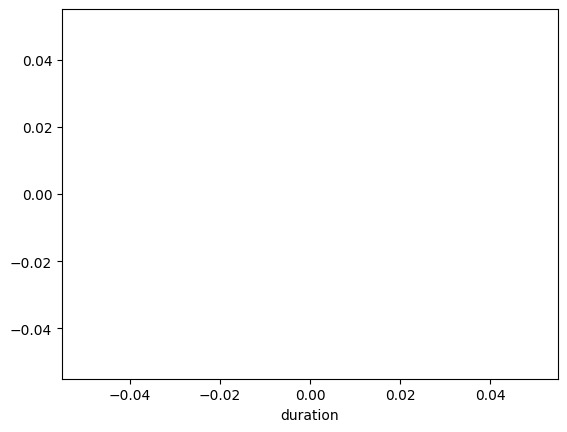

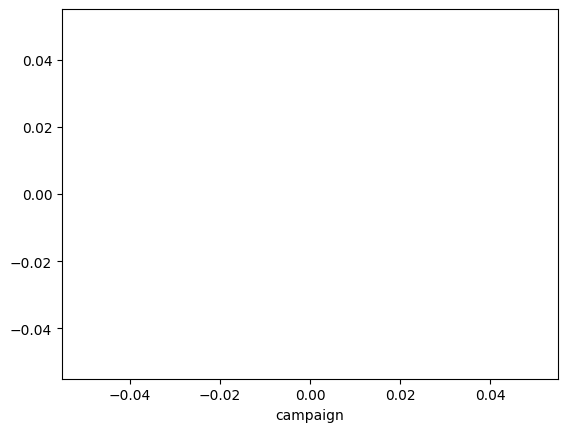

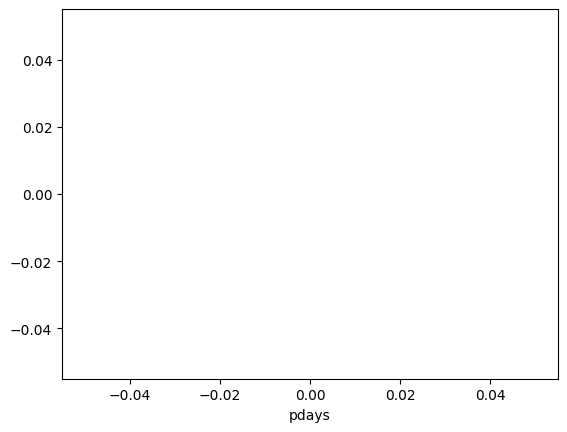

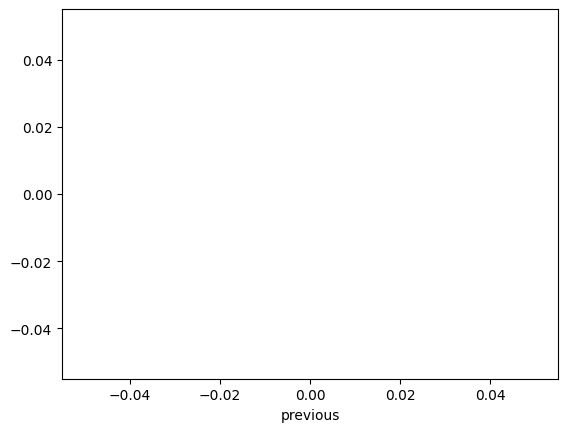

In [ ]:
# Scatterplot to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df,x=i)
    plt.show()

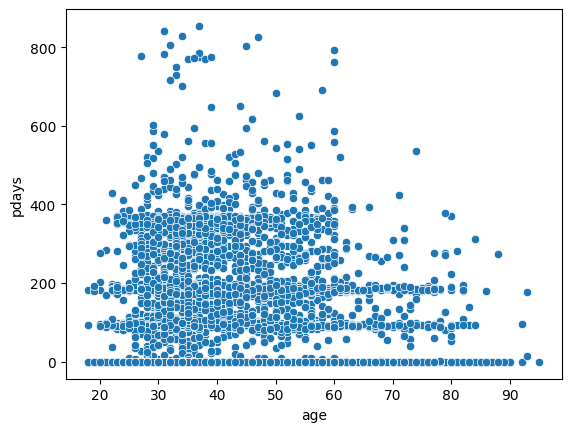

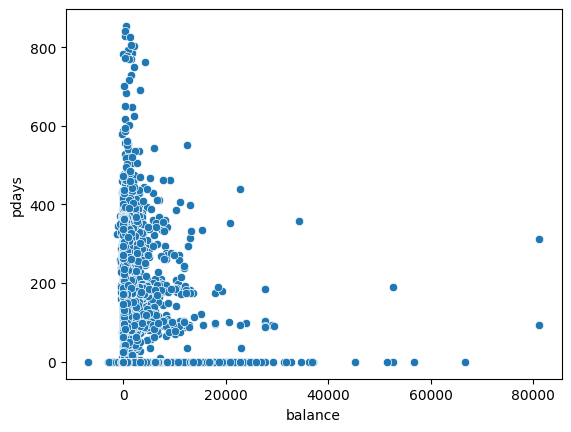

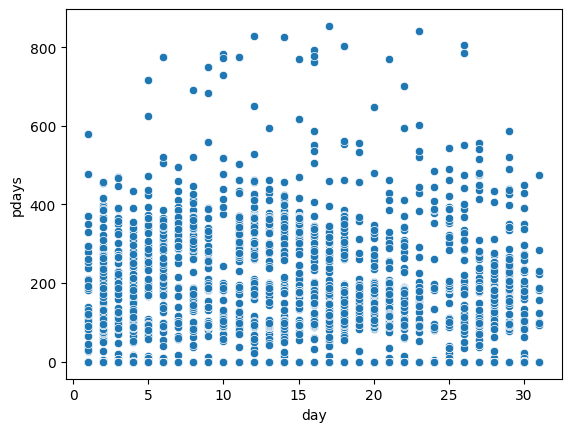

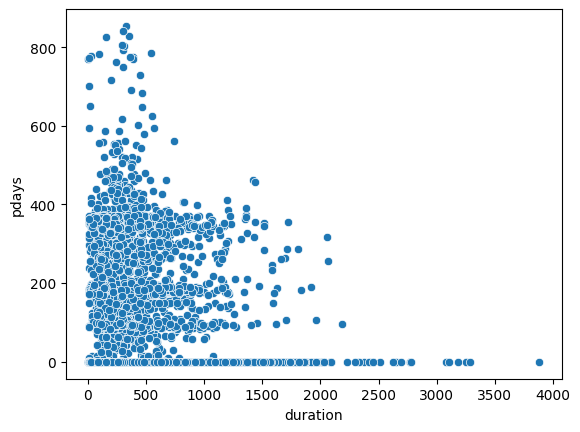

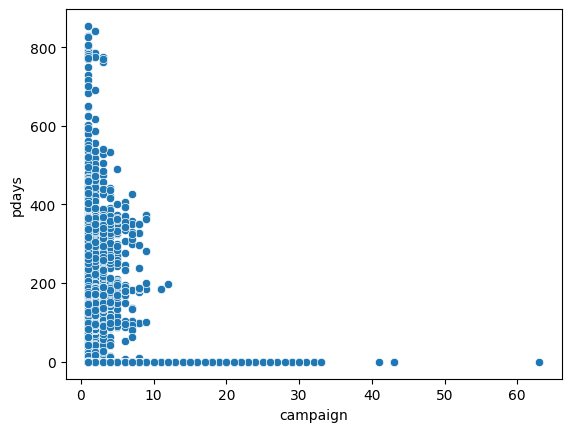

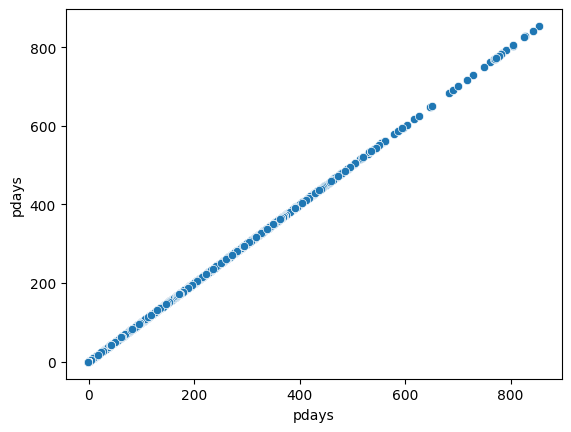

In [ ]:
# Scatterplot to understand the relation
import seaborn as sns
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays' ]:
    sns.scatterplot(data=df,x=i,y='pdays')
    plt.show()

In [ ]:
df.select_dtypes(include="number")

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [ ]:
df.select_dtypes(include="number").columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
# correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

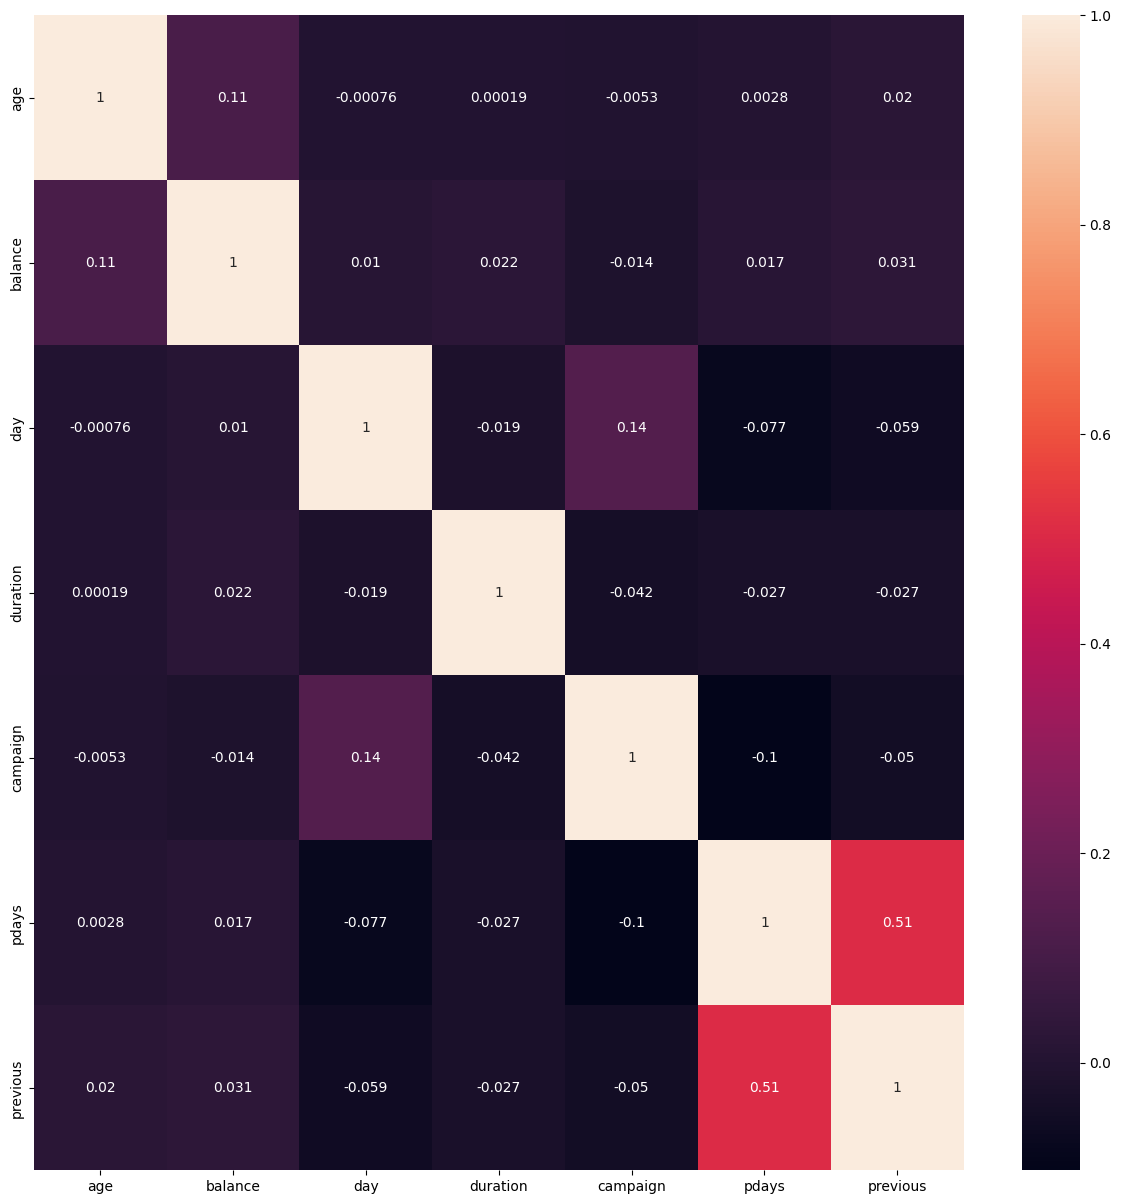

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


# Step 5.Missing Values Treatment

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
for i in ['age','day','previous']:
    df[i].fillna(df[i].median(),inplace=True)

<ipython-input-23-6a60fb22074e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)


In [ ]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

# Step 6.Outliers Treatment

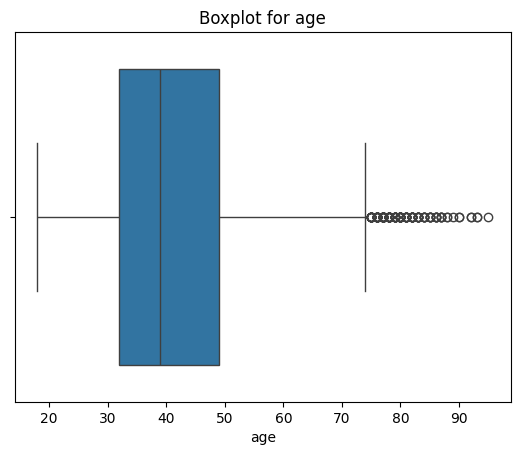

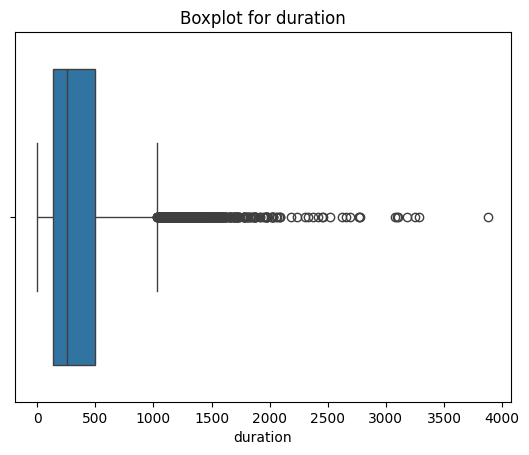

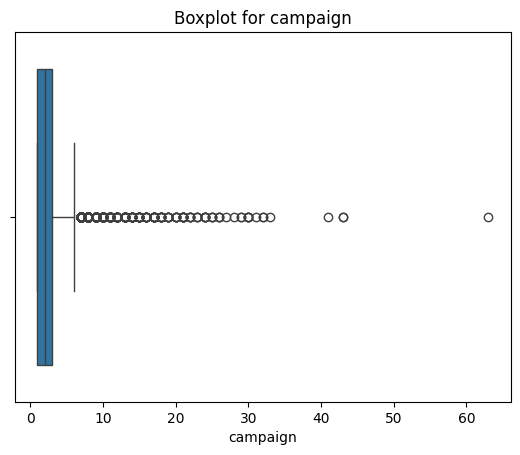

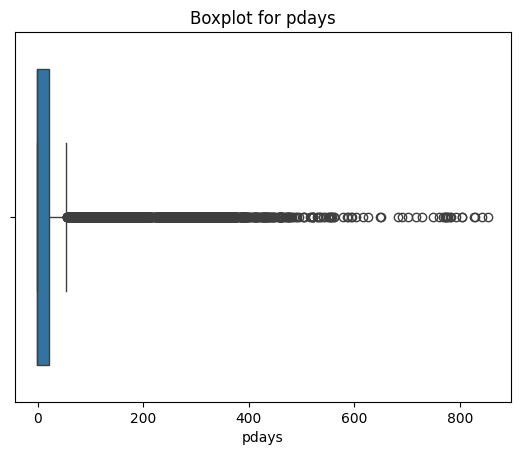

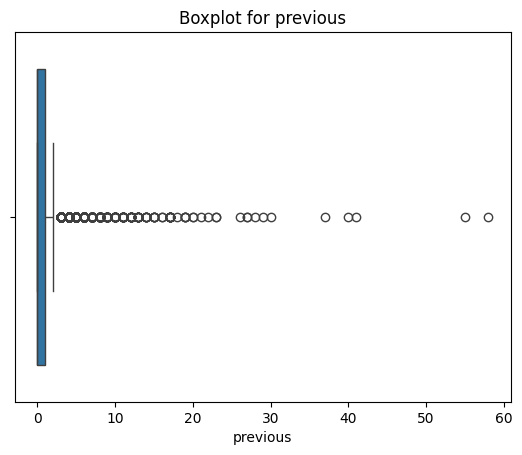

In [ ]:
#1. Visualizing Outliers
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
# 2. Identifying Outliers Using the IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Example: Detect outliers in 'duration'
outliers = detect_outliers(df , 'duration')
print(outliers)


        age          job   marital  education default  balance housing loan  \
0      59.0       admin.   married  secondary      no   2343.0     yes   no   
1      56.0       admin.   married  secondary      no     45.0      no   no   
2      41.0   technician   married  secondary      no   1270.0     yes   no   
6      56.0   management   married   tertiary      no    830.0     yes  yes   
9      28.0     services    single  secondary      no   5090.0     yes   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
10647  31.0   technician    single  secondary      no    433.0      no   no   
10788  41.0  blue-collar   married  secondary      no   4910.0     yes   no   
10798  67.0   technician   married  secondary      no      0.0      no   no   
10802  58.0   management  divorced   tertiary      no    577.0      no   no   
11008  56.0     services   married    unknown      no    616.0      no   no   

        contact   day month  duration  campaign  pd

In [ ]:
#3. Outlier Treatment Techniques
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'duration'
df = remove_outliers(df , 'duration')


In [ ]:
# Z-Score Method
from scipy import stats

df = data[(np.abs(stats.zscore(data['duration'])) < 3)]


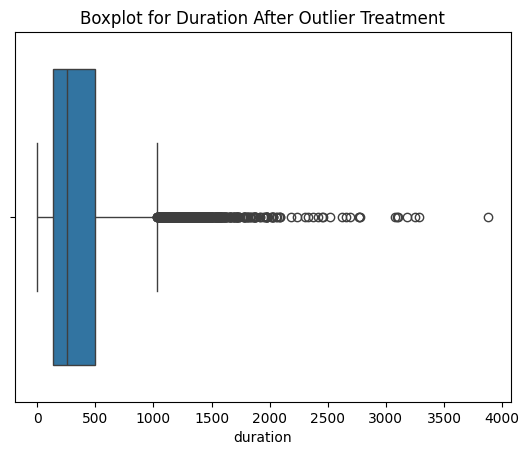

In [ ]:
# Re-Visualize After Treatment
sns.boxplot(x=data['duration'])
plt.title('Boxplot for Duration After Outlier Treatment')
plt.show()


In [ ]:
#Scaling After Outlier Treatment
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


# Step 7.Duplicates and Garbage value Treatments

In [ ]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Step 8.Encoding of data

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load data
data = pd.read_csv('bank.csv')

# Label Encoding for binary columns
label_enc = LabelEncoder()
for col in ['default', 'housing', 'loan', 'deposit']:
    data[col] = label_enc.fit_transform(data[col])

# One-Hot Encoding for nominal categorical columns
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'day', 'poutcome'])

# Replace 'unknown' with NaN and fill
data.replace('unknown', np.nan, inplace=True)
# data.fillna(method='ffill', inplace=True)
data.ffill(inplace=True)

# Scale numerical features
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data[num_cols] = scaler.fit_transform(data[num_cols])

# Ready for modeling!


# Step 9.Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.DataFrame({
    'age': [25, 30, 45, 50],
    'duration': [100, 200, 300, 400],
    'campaign': [1, 2, 3, 4],
    'deposit': [1, 0, 1, 0]   # Example target variable
})

# Define numerical columns
num_cols = ['age', 'duration', 'campaign']

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data)


   age  duration  campaign  deposit
0  0.0  0.000000  0.000000        1
1  0.2  0.333333  0.333333        0
2  0.8  0.666667  0.666667        1
3  1.0  1.000000  1.000000        0


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['deposit'])   # Features
y = data['deposit']                  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Sample bank marketing dataset
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50],
    'duration': [100, 200, 300, 400, 500, 600],
    'campaign': [1, 2, 1, 2, 3, 4],
    'y': ['yes', 'no', 'no', 'yes', 'no', 'yes']  # Target variable
})

# Separate features and target variable
X = data.drop('y', axis=1)  # Features
y = data['y']               # Target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for testing, 70% for training
    random_state=42,      # Ensures reproducibility
    stratify=y            # Maintains the same target distribution
)
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

print("Training Set Distribution:\n", y_train.value_counts(normalize=True))
print("Test Set Distribution:\n", y_test.value_counts(normalize=True))





Training Set Size: (4, 3)
Test Set Size: (2, 3)
Training Set Distribution:
 y
no     0.5
yes    0.5
Name: proportion, dtype: float64
Test Set Distribution:
 y
yes    0.5
no     0.5
Name: proportion, dtype: float64


In [ ]:
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
import joblib

# Save the scaler for future use
joblib.dump(scaler, 'minmax_scaler.pkl')

# Load it later
scaler = joblib.load('minmax_scaler.pkl')


In [ ]:
print(X_train.describe())  # Should show values between 0 and 1


            age  duration  campaign
count  4.000000  4.000000  4.000000
mean   0.437500  0.437500  0.416667
std    0.426956  0.426956  0.419435
min    0.000000  0.000000  0.000000
25%    0.187500  0.187500  0.250000
50%    0.375000  0.375000  0.333333
75%    0.625000  0.625000  0.500000
max    1.000000  1.000000  1.000000


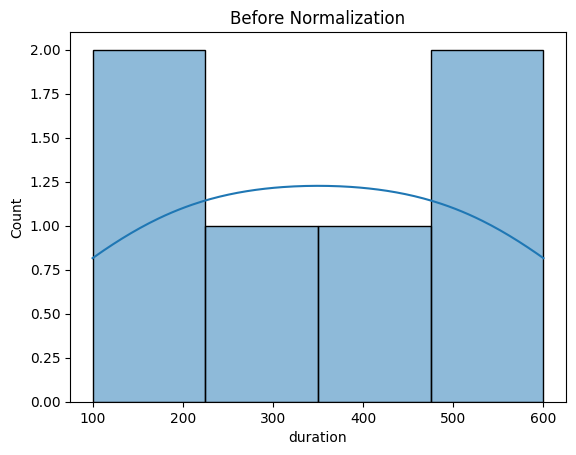

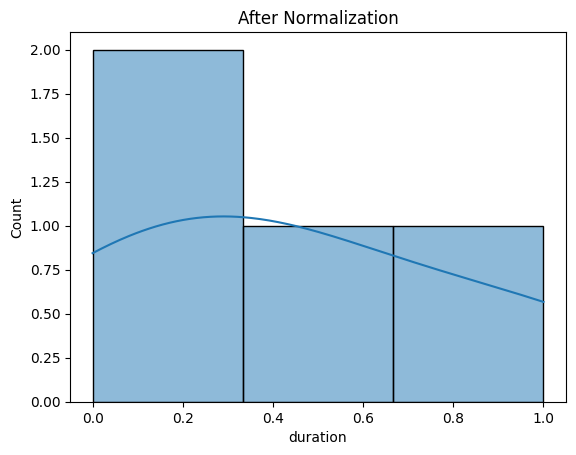

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before normalization
sns.histplot(data['duration'], kde=True)
plt.title("Before Normalization")
plt.show()

# After normalization
sns.histplot(X_train['duration'], kde=True)
plt.title("After Normalization")
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', RandomForestClassifier())])

# Modeling


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

=== Logistic Regression ===
Train Accuracy: 0.8247792141302956
Test Accuracy: 0.8250223947447

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.85      0.84      1762
        True       0.83      0.79      0.81      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.82      0.82      3349
weighted avg       0.83      0.83      0.82      3349



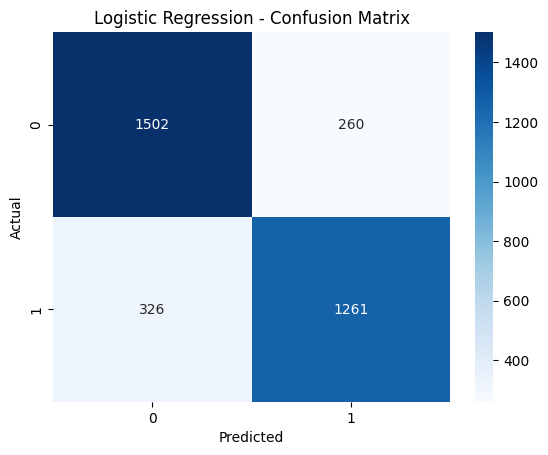

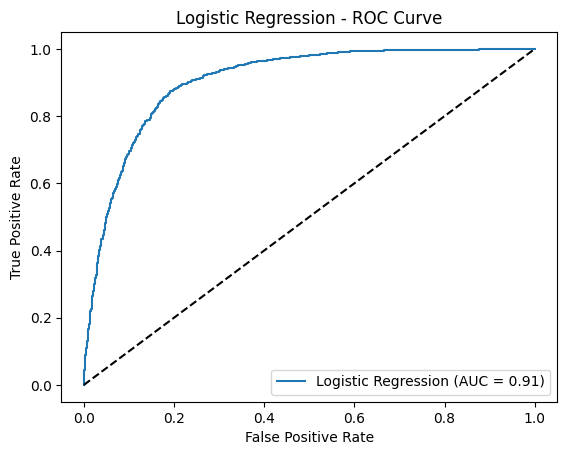

Specificity: 0.8524404086265607
Matthews Correlation Coefficient (MCC): 0.6488694745127113


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

10-Fold Cross-Validation Mean Accuracy: 0.7874042574355913

=== Decision Tree ===
Train Accuracy: 1.0
Test Accuracy: 0.7814272917288743

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.80      0.79      1762
        True       0.78      0.76      0.77      1587

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



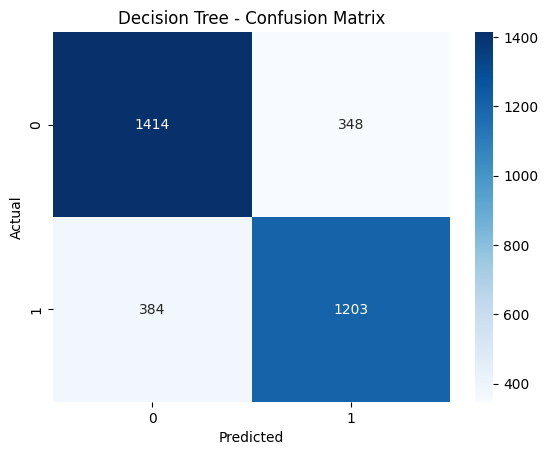

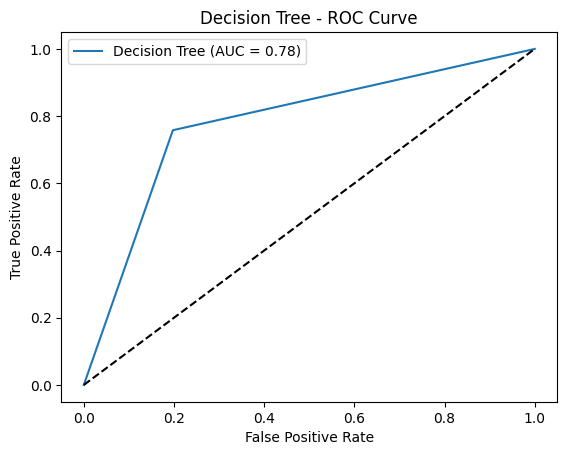

Specificity: 0.8024971623155505
Matthews Correlation Coefficient (MCC): 0.5612940715759693
10-Fold Cross-Validation Mean Accuracy: 0.7927792377816925

=== Random Forest ===
Train Accuracy: 1.0
Test Accuracy: 0.8542848611525828

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.84      0.86      1762
        True       0.83      0.88      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.86      0.85      3349
weighted avg       0.86      0.85      0.85      3349



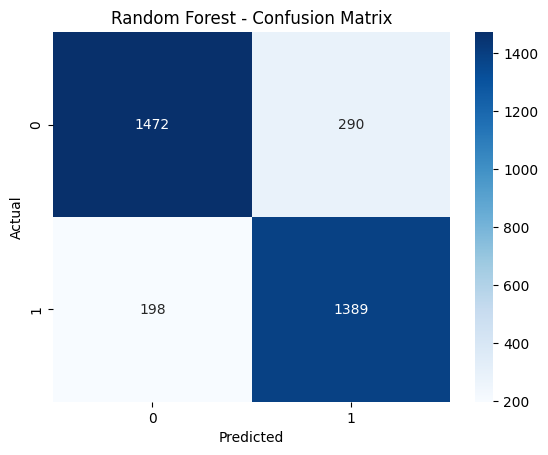

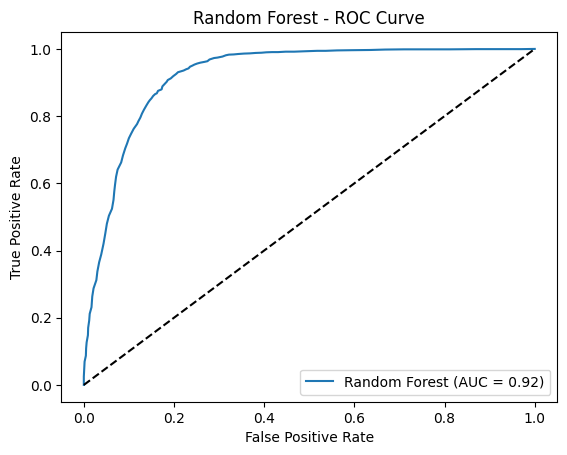

Specificity: 0.8354143019296254
Matthews Correlation Coefficient (MCC): 0.7096822724487389
10-Fold Cross-Validation Mean Accuracy: 0.8534316509595916

=== SVM ===
Train Accuracy: 0.87725585562524
Test Accuracy: 0.8459241564646163

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.84      0.85      1762
        True       0.83      0.85      0.84      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



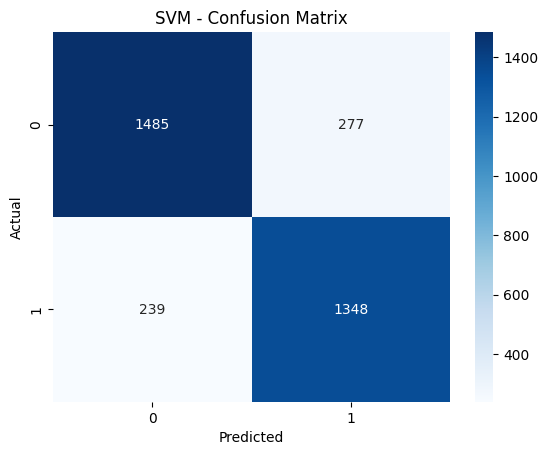

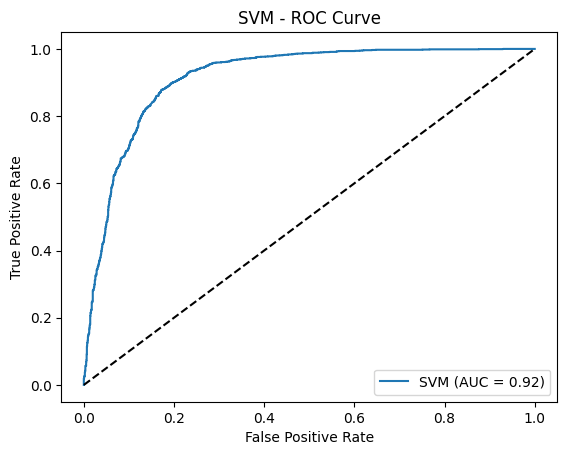

Specificity: 0.8427922814982974
Matthews Correlation Coefficient (MCC): 0.691550220339442


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, matthews_corrcoef
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
data = pd.read_csv('bank.csv')  # Replace with actual path

# Clean Column Names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define Features and Target
target_column = 'y_yes' if 'y_yes' in data.columns else 'deposit_yes'
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in data!")

X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Evaluation Function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Accuracy
    print(f"\n=== {name} ===")
    print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend()
    plt.show()

    # Specificity Calculation
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    print("Matthews Correlation Coefficient (MCC):", mcc)

    # 10-Fold Cross-Validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print("10-Fold Cross-Validation Mean Accuracy:", np.mean(scores))

# Apply and Evaluate All Models
for name, model in models.items():
    evaluate_model(name, model)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank.csv')  # Adjust path if needed

# List of numeric columns
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']

# Set up the plot grid
plt.figure(figsize=(14, 10))

# Plot histogram for each numeric column
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Histograms of Numeric Columns', fontsize=16, y=1.02)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank.csv')  # Adjust path if needed

# List of numeric columns
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each numeric column's histogram
for column in numeric_cols:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)  # alpha for transparency

# Adding labels and title
plt.title('Histograms of Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show legend to differentiate columns
plt.legend(title="Columns")

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("bank.csv")  # Make sure this path is correct

# Create a boxplot for 'duration' vs 'y' (target)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='deposit', y='duration', palette='Set2')
plt.title('Boxplot of Call Duration vs Subscription Outcome')
plt.xlabel('Subscribed to Term Deposit (deposit)')
plt.ylabel('Call Duration (seconds)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank.csv')  # Adjust path if needed

# Create a scatter plot for 'age' vs 'duration', color-coded by 'deposit' (whether they subscribed)
plt.figure(figsize=(10, 6))

# Scatter plot with color coding for 'deposit' (subscription outcome)
sns.scatterplot(data=df, x='age', y='duration', hue='deposit', palette='Set1', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Age vs Call Duration')
plt.xlabel('Age')
plt.ylabel('Call Duration (seconds)')

# Display legend for the 'deposit' categories
plt.legend(title="Subscription Outcome")

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank.csv')  # Adjust path if needed

# Create a scatter plot for 'balance' vs 'previous', color-coded by 'deposit' (whether they subscribed)
plt.figure(figsize=(10, 6))

# Scatter plot with color coding for 'deposit' (subscription outcome)
sns.scatterplot(data=df, x='balance', y='previous', hue='deposit', palette='Set1', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Balance vs Previous Contacts')
plt.xlabel('Balance')
plt.ylabel('Previous Contacts')

# Display legend for the 'deposit' categories
plt.legend(title="Subscription Outcome")

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
df = pd.read_csv('bank.csv')  # Adjust the path if necessary

# Select numeric columns for correlation matrix
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Define your custom color palette
custom_colors = [
    '#000080',  # Navy Blue
    '#808080',  # Grey
    '#000000',  # Black
    '#FFDB58',  # Mustard
    '#FFDAB9',  # Skin (Peach)
    '#008000'   # Green
]

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", custom_colors, N=256)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.7, square=True, cbar_kws={'label': 'Correlation'})

# Add title and show plot
plt.title('Custom Color Correlation Heatmap (Bank Marketing Data)', fontsize=18)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank.csv')  # Change file name if needed

# Select numeric columns for outlier analysis
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'pdays']

# Basic statistics
print("Summary Statistics:")
print(df[numeric_cols].describe())

# Step 1: Boxplots to visualize outliers
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Step 2: Detect outliers using IQR method
outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = len(outliers)
    print(f"\n{col}:")
    print(f"  Lower Bound = {lower_bound}")
    print(f"  Upper Bound = {upper_bound}")
    print(f"  Outliers Detected = {len(outliers)}")

# Step 3 (Optional): Remove outliers and show cleaned shape
df_cleaned = df.copy()
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape (Outliers Removed): {df_cleaned.shape}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('bank.csv')

# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['deposit'] = label_encoder.fit_transform(df['deposit'])  # Target variable

# Features and Target Variable
X = df.drop(columns=['deposit'])
y = df['deposit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# ROC Curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

# Print Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('bank.csv')

# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['deposit'] = label_encoder.fit_transform(df['deposit'])  # Target variable

# Features and Target Variable
X = df.drop(columns=['deposit'])
y = df['deposit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# ROC Curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

# Print Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('bank.csv')

# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['deposit'] = label_encoder.fit_transform(df['deposit'])  # Target variable

# Features and Target Variable
X = df.drop(columns=['deposit'])
y = df['deposit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# ROC Curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

# Print Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
